<a href="https://colab.research.google.com/github/adithyanperingode/BITS-PG-Diploma-Business-Analytics/blob/main/Hierarchial_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

In [4]:
# reading the CSV fil
Data_Raw = pd.read_csv("https://raw.githubusercontent.com/adithyanperingode/Datasets/master/ASM/Data_Post%20EDA.csv")
Data_Raw

,Gender,Working_City,Marriage status/ Kids,Annual Salary,Age,Work Experience,Average Commute Time,Industry,Job Profile,Work Mode,Employment Type,Flexibility in office Timings,Number of total paid leaves,Working days in Week,Actual Work hours per week,Expected Work hours per week,Worklife Balance
0,Male,Pune,Married and No Kids,35Lacs +,31,6,0.0,"Banking, Finance & Insurance",Technology,Work From Home (WFH),Permanent - Company Payroll,Semi-Fixed working hours,40,Mon to Fri or 5 days,55.0,45.0,1
1,Male,Mumbai,Un Married,15Lacs to 20Lacs,30,3,30.0,"Banking, Finance & Insurance",Others,Work From Office (WFO),Permanent - Company Payroll,Fixed working hours,21,Mon to Fri & Alternate Saturdays,54.0,45.0,1
2,Male,Mumbai,Un Married,20Lacs to 25Lacs,28,3,90.0,"Banking, Finance & Insurance",Technology,Work From Office (WFO),Permanent - Company Payroll,Semi-Fixed working hours,22,Mon to Fri & Alternate Saturdays,60.0,45.0,1
3,Female,Others,Married and No Kids,5Lacs to 10Lacs,29,4,25.0,Medical/ Healthcare,Operations,Work From Office (WFO),Permanent - Company Payroll,Fixed working hours,30,Mon to Sat or 6 days,50.0,45.0,1
4,Male,Pune,Un Married,5Lacs to 10Lacs,29,5,15.0,"Banking, Finance & Insurance",Technology,Work From Office (WFO),Internship,Liberal working hours,0,Mon to Fri or 5 days,45.0,45.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Male,Kochi,Un Married,0 to 5 Lacs,28,7,15.0,Others,Engineering,Work From Office (WFO),Contract Basis,Fixed working hours,4,Mon to Sat or 6 days,50.0,48.0,1
112,Female,Others,Married and have Kids,15Lacs to 20Lacs,37,14,15.0,Information & Technology,Operations,Hybrid (WFH + WFO),Permanent - Company Payroll,Liberal working hours,20,Mon to Fri or 5 days,60.0,42.5,1
113,Male,Delhi & NCR,Married and No Kids,5Lacs to 10Lacs,27,7,40.0,"Banking, Finance & Insurance",Sales,Work From Office (WFO),Permanent - Company Payroll,Fixed working hours,25,Mon to Sat or 6 days,54.0,54.0,1
114,Male,Pune,Un Married,5Lacs to 10Lacs,29,8,70.0,Manufacturing,Engineering,Work From Office (WFO),Permanent - Company Payroll,Fixed working hours,27,Mon to Sat or 6 days,48.0,48.0,1


In [5]:
# Adding e one hot encoding to all catagorical columns in one shot in same data frame
Data_Raw = pd.get_dummies(Data_Raw, columns=['Gender','Working_City','Marriage status/ Kids','Industry','Job Profile','Work Mode','Employment Type','Flexibility in office Timings','Working days in Week'], dtype=int)
le = LabelEncoder()
Data_Raw["Annual Salary"] = le.fit_transform(Data_Raw["Annual Salary"])
Data_Raw.head(5)

,Annual Salary,Age,Work Experience,Average Commute Time,Number of total paid leaves,Actual Work hours per week,Expected Work hours per week,Worklife Balance,Gender_Female,Gender_Male,...,Employment Type_Contract Basis,Employment Type_Freelancing,Employment Type_Internship,Employment Type_Permanent - Company Payroll,Flexibility in office Timings_Fixed working hours,Flexibility in office Timings_Liberal working hours,Flexibility in office Timings_Semi-Fixed working hours,Working days in Week_Mon to Fri & Alternate Saturdays,Working days in Week_Mon to Fri or 5 days,Working days in Week_Mon to Sat or 6 days
0,6,31,6,0.0,40,55.0,45.0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
1,2,30,3,30.0,21,54.0,45.0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
2,3,28,3,90.0,22,60.0,45.0,1,0,1,...,0,0,0,1,0,0,1,1,0,0
3,7,29,4,25.0,30,50.0,45.0,1,1,0,...,0,0,0,1,1,0,0,0,0,1
4,7,29,5,15.0,0,45.0,45.0,1,0,1,...,0,0,1,0,0,1,0,0,1,0


In [6]:
# Move Worklife Balance to end column
cols = list(Data_Raw.columns)
cols.remove('Worklife Balance')
cols.append('Worklife Balance')
Data_Raw = Data_Raw[cols]
Data_Raw.head(5)

,Annual Salary,Age,Work Experience,Average Commute Time,Number of total paid leaves,Actual Work hours per week,Expected Work hours per week,Gender_Female,Gender_Male,Working_City_Bangalore,...,Employment Type_Freelancing,Employment Type_Internship,Employment Type_Permanent - Company Payroll,Flexibility in office Timings_Fixed working hours,Flexibility in office Timings_Liberal working hours,Flexibility in office Timings_Semi-Fixed working hours,Working days in Week_Mon to Fri & Alternate Saturdays,Working days in Week_Mon to Fri or 5 days,Working days in Week_Mon to Sat or 6 days,Worklife Balance
0,6,31,6,0.0,40,55.0,45.0,0,1,0,...,0,0,1,0,0,1,0,1,0,1
1,2,30,3,30.0,21,54.0,45.0,0,1,0,...,0,0,1,1,0,0,1,0,0,1
2,3,28,3,90.0,22,60.0,45.0,0,1,0,...,0,0,1,0,0,1,1,0,0,1
3,7,29,4,25.0,30,50.0,45.0,1,0,0,...,0,0,1,1,0,0,0,0,1,1
4,7,29,5,15.0,0,45.0,45.0,0,1,0,...,0,1,0,0,1,0,0,1,0,1


In [7]:
#Apply z score to data frame except Work Life balance coloumn
num_cols = Data_Raw.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('Worklife Balance')
Data_Scaled = Data_Raw[num_cols].apply(zscore)
Data_Scaled.head()

,Annual Salary,Age,Work Experience,Average Commute Time,Number of total paid leaves,Actual Work hours per week,Expected Work hours per week,Gender_Female,Gender_Male,Working_City_Bangalore,...,Employment Type_Contract Basis,Employment Type_Freelancing,Employment Type_Internship,Employment Type_Permanent - Company Payroll,Flexibility in office Timings_Fixed working hours,Flexibility in office Timings_Liberal working hours,Flexibility in office Timings_Semi-Fixed working hours,Working days in Week_Mon to Fri & Alternate Saturdays,Working days in Week_Mon to Fri or 5 days,Working days in Week_Mon to Sat or 6 days
0,0.966433,0.096533,-0.420792,-1.297025,1.030351,0.527336,-0.04729,-0.470162,0.470162,-0.355266,...,-0.290021,-0.132453,-0.162938,0.370479,-0.885785,-0.577350,1.490712,-0.370479,0.781736,-0.590624
1,-0.461672,-0.075741,-0.913841,-0.402111,-0.569997,0.431382,-0.04729,-0.470162,0.470162,-0.355266,...,-0.290021,-0.132453,-0.162938,0.370479,1.128942,-0.577350,-0.670820,2.699206,-1.279204,-0.590624
2,-0.104646,-0.420289,-0.913841,1.387717,-0.485768,1.007109,-0.04729,-0.470162,0.470162,-0.355266,...,-0.290021,-0.132453,-0.162938,0.370479,-0.885785,-0.577350,1.490712,2.699206,-1.279204,-0.590624
3,1.323459,-0.248015,-0.749491,-0.551264,0.188063,0.047564,-0.04729,2.126925,-2.126925,-0.355266,...,-0.290021,-0.132453,-0.162938,0.370479,1.128942,-0.577350,-0.670820,-0.370479,-1.279204,1.693123
4,1.323459,-0.248015,-0.585141,-0.849568,-2.338801,-0.432209,-0.04729,-0.470162,0.470162,-0.355266,...,-0.290021,-0.132453,6.137318,-2.699206,-0.885785,1.732051,-0.670820,-0.370479,0.781736,-0.590624


In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [11]:
model.fit(Data_Scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)

In [15]:
Data_Scaled['labels'] = model.labels_
Data_Scaled

,Annual Salary,Age,Work Experience,Average Commute Time,Number of total paid leaves,Actual Work hours per week,Expected Work hours per week,Gender_Female,Gender_Male,Working_City_Bangalore,...,Employment Type_Freelancing,Employment Type_Internship,Employment Type_Permanent - Company Payroll,Flexibility in office Timings_Fixed working hours,Flexibility in office Timings_Liberal working hours,Flexibility in office Timings_Semi-Fixed working hours,Working days in Week_Mon to Fri & Alternate Saturdays,Working days in Week_Mon to Fri or 5 days,Working days in Week_Mon to Sat or 6 days,labels
0,0.966433,0.096533,-0.420792,-1.297025,1.030351,0.527336,-0.047290,-0.470162,0.470162,-0.355266,...,-0.132453,-0.162938,0.370479,-0.885785,-0.577350,1.490712,-0.370479,0.781736,-0.590624,0
1,-0.461672,-0.075741,-0.913841,-0.402111,-0.569997,0.431382,-0.047290,-0.470162,0.470162,-0.355266,...,-0.132453,-0.162938,0.370479,1.128942,-0.577350,-0.670820,2.699206,-1.279204,-0.590624,0
2,-0.104646,-0.420289,-0.913841,1.387717,-0.485768,1.007109,-0.047290,-0.470162,0.470162,-0.355266,...,-0.132453,-0.162938,0.370479,-0.885785,-0.577350,1.490712,2.699206,-1.279204,-0.590624,0
3,1.323459,-0.248015,-0.749491,-0.551264,0.188063,0.047564,-0.047290,2.126925,-2.126925,-0.355266,...,-0.132453,-0.162938,0.370479,1.128942,-0.577350,-0.670820,-0.370479,-1.279204,1.693123,0
4,1.323459,-0.248015,-0.585141,-0.849568,-2.338801,-0.432209,-0.047290,-0.470162,0.470162,-0.355266,...,-0.132453,6.137318,-2.699206,-0.885785,1.732051,-0.670820,-0.370479,0.781736,-0.590624,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,-1.175724,-0.420289,-0.256442,-0.849568,-2.001886,0.047564,0.339934,-0.470162,0.470162,-0.355266,...,-0.132453,-0.162938,-2.699206,1.128942,-0.577350,-0.670820,-0.370479,-1.279204,1.693123,0
112,-0.461672,1.130177,0.894005,-0.849568,-0.654225,1.007109,-0.369977,2.126925,-2.126925,-0.355266,...,-0.132453,-0.162938,0.370479,-0.885785,1.732051,-0.670820,-0.370479,0.781736,-0.590624,0
113,1.323459,-0.592563,-0.256442,-0.103807,-0.233081,0.431382,1.114381,-0.470162,0.470162,-0.355266,...,-0.132453,-0.162938,0.370479,1.128942,-0.577350,-0.670820,-0.370479,-1.279204,1.693123,0
114,1.323459,-0.248015,-0.092092,0.791107,-0.064624,-0.144345,0.339934,-0.470162,0.470162,-0.355266,...,-0.132453,-0.162938,0.370479,1.128942,-0.577350,-0.670820,-0.370479,-1.279204,1.693123,0


In [23]:
Data_Attr = Data_Raw.iloc[:, :-1]
Data_Attr['labels'] = model.labels_
Data_Attr

,Annual Salary,Age,Work Experience,Average Commute Time,Number of total paid leaves,Actual Work hours per week,Expected Work hours per week,Gender_Female,Gender_Male,Working_City_Bangalore,...,Employment Type_Freelancing,Employment Type_Internship,Employment Type_Permanent - Company Payroll,Flexibility in office Timings_Fixed working hours,Flexibility in office Timings_Liberal working hours,Flexibility in office Timings_Semi-Fixed working hours,Working days in Week_Mon to Fri & Alternate Saturdays,Working days in Week_Mon to Fri or 5 days,Working days in Week_Mon to Sat or 6 days,labels
0,6,31,6,0.0,40,55.0,45.0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
1,2,30,3,30.0,21,54.0,45.0,0,1,0,...,0,0,1,1,0,0,1,0,0,0
2,3,28,3,90.0,22,60.0,45.0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
3,7,29,4,25.0,30,50.0,45.0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
4,7,29,5,15.0,0,45.0,45.0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0,28,7,15.0,4,50.0,48.0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
112,2,37,14,15.0,20,60.0,42.5,1,0,0,...,0,0,1,0,1,0,0,1,0,0
113,7,27,7,40.0,25,54.0,54.0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
114,7,29,8,70.0,27,48.0,48.0,0,1,0,...,0,0,1,1,0,0,0,0,1,0


In [24]:
Data_Clust = Data_Attr.groupby(['labels'])

In [25]:
Data_Clust.mean()

,Annual Salary,Age,Work Experience,Average Commute Time,Number of total paid leaves,Actual Work hours per week,Expected Work hours per week,Gender_Female,Gender_Male,Working_City_Bangalore,...,Employment Type_Contract Basis,Employment Type_Freelancing,Employment Type_Internship,Employment Type_Permanent - Company Payroll,Flexibility in office Timings_Fixed working hours,Flexibility in office Timings_Liberal working hours,Flexibility in office Timings_Semi-Fixed working hours,Working days in Week_Mon to Fri & Alternate Saturdays,Working days in Week_Mon to Fri or 5 days,Working days in Week_Mon to Sat or 6 days
labels,,,,,,,,,,,,,,,,,,,,,
0,3.263158,30.517544,8.657895,43.979532,28.210526,49.820175,45.399123,0.175439,0.824561,0.114035,...,0.078947,0.0,0.026316,0.894737,0.447368,0.236842,0.315789,0.114035,0.622807,0.263158
1,7.000000,27.000000,3.000000,0.000000,0.000000,48.000000,72.000000,0.000000,1.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
2,3.000000,25.000000,3.000000,30.000000,5.000000,15.000000,15.000000,1.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000


In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [28]:
#Pairwise distribution between data points
from scipy.spatial.distance import pdist

In [31]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(Data_Scaled, metric='euclidean', method='average')

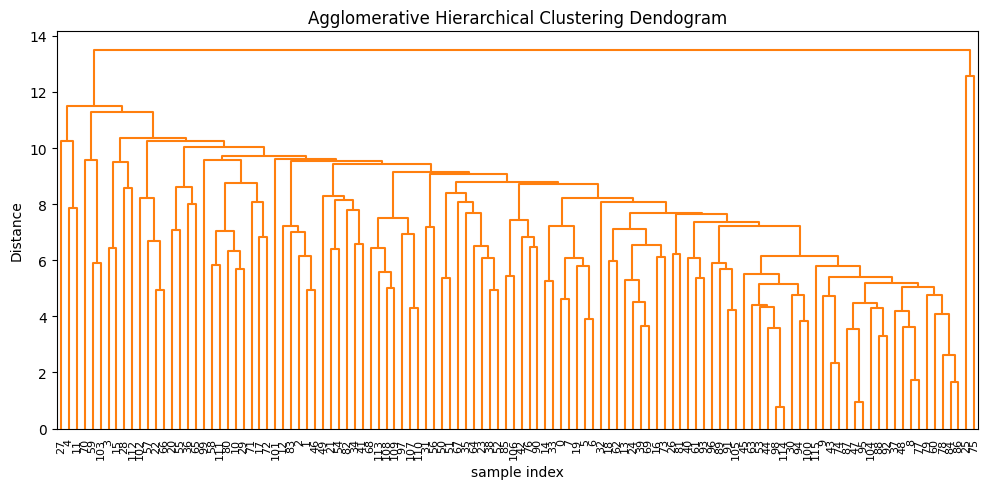

In [32]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [34]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(Data_Scaled, metric='euclidean', method='complete')

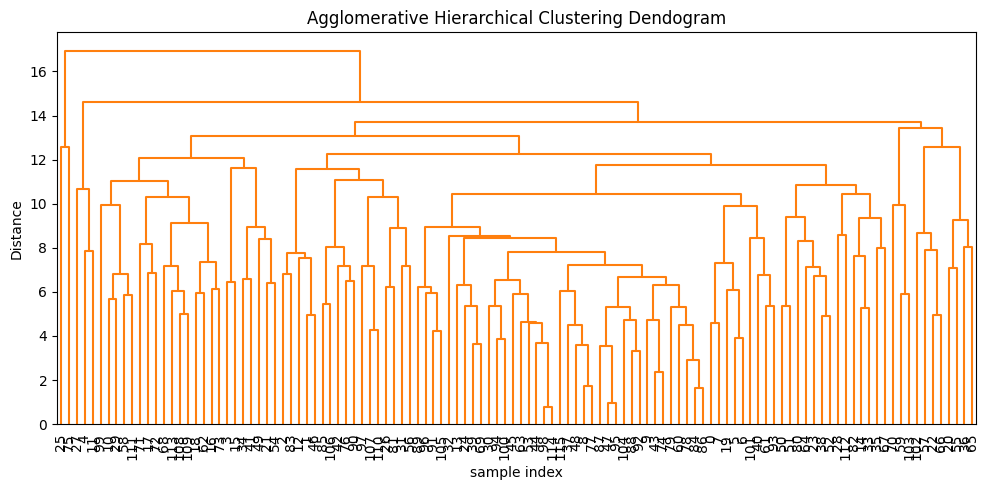

In [35]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [36]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(Data_Scaled, metric='euclidean', method='ward')

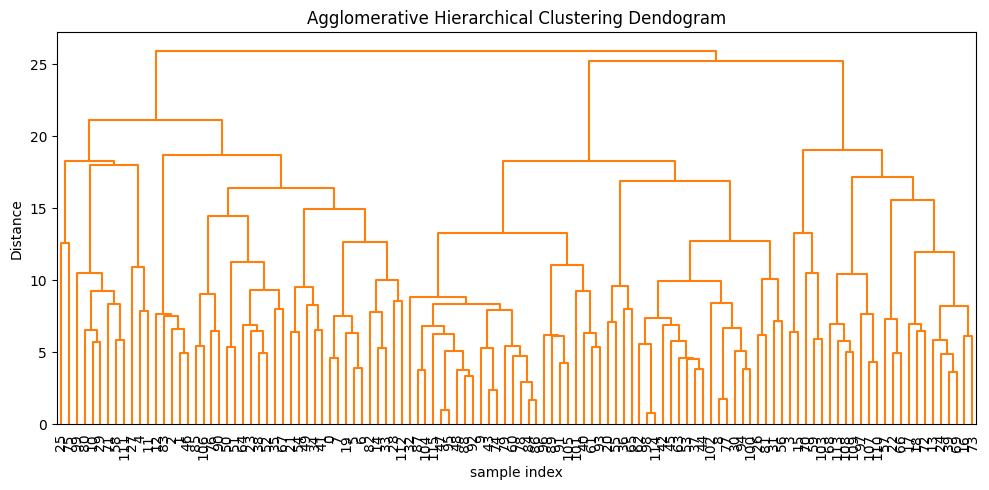

In [37]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()